# DNA Sequence Classification for Species Prediction

![](img/DNA_intro_background.jpg)


# Project Introduction

For this project, my main focus is going to be on demonstrating classification models and methods. To pick an example, I decided to research DNA sequencing analysis, because I thought it would be interesting, and the data that is available publicly is astonishingly immense.

DNA is found in the cells of every living thing on Earth. Scientists can study the DNA of organisms to understand more about the function of an organism or analyze the DNA to determine if they have found a new species.

DNA classification has many uses - from species identification to differentiation, research can provide insights on how different one species is from another, or how one species evolved. Genetic sequence analysis can identify the differences in genes, insertions, and deletions within subsets of the DNA, or identify the change in phenotypes from species to species. Analysis of the differences in the sequences from different species can tell us a lot about the differences between species, but also how similar all organisms are.

Through optimization of the modeling in DNA sequence analysis, genomic researchers can make more accurate and faster results for classifying and differentiating species from DNA samples.

### Hypothesis:

What if I could take DNA information from a certain genome and compare it to other genomes? Would there be a signal in the noise? Of course, there would be and there is, but I started with a null hypothesis in question: Could these genomes be unrelated or random sequences next when compared?

Alternatively, I hope to find the pattern of similarity, and I hope that will be measured in the metrics of my model. I am no biologist, but as a data scientist, I will be viewing this problem as one of loss - observing the similarities between genomes and explaining the variance between them by predicting their respective class. From a technical point of view, this project will use machine learning methods to analyze and classify the DNA sequences from different species. The results of this model will be used to predict the species of a given set of classes based on the genetic sequence alone. This project will focus primarily on the mathematical differences between sequences in genetic code, rather than any special genetic analysis of genes and phenotypes between species. I am interested in the problem of how similar or different two species may be from one other, from a generalized and statistical point of view.

# What is DNA?

DNA, or deoxyribonucleic acid, is a molecule that contains the inherited code used by cells in an organism to generate proteins. It is found in the nucleus of cells. DNA consists of four bases: adenine or A, cytosine or C, guanine or G, and thymine or T. Each strand of DNA is composed of two strands that are held together by a sugar-based structure in the shape of a double helix. Each base is connected to the opposite strand by its complementary base: A always connects to T, C always connects to G, G always connects to C, and T always connects to A. This means that each complementary strand of DNA is like a reflection of the other. When DNA is sequenced into a string composed of the four bases, only one string has been cataloged in the data I am reading, without its complement.

![](img/DNA.jpeg)

Through complicated biological and molecular processes, DNA replicates or creates copies of itself known as mRNA. mRNA strands are short segmented copies of the DNA that can recombine with other segments of mRNA and in turn create combinations that are code for creating proteins. Different combinations create different proteins and these proteins are then used throughout the cell and the organism. DNA acts like computer code for creating the proteins like a program and thus why it is referred to as genetic code or the building blocks of life. Subsets of DNA strands can be identified for creating specific proteins and these are known as genes.

The DNA in every cell is coiled up tightly together, and although it takes up a microscopic amount of space, it is very long. If you carefully unraveled an entire strand of Human DNA it would be about 1.8 meters long and contains 3 billion base pairs i.e. combinations of A, C, G, and T.

Advances in technology have allowed scientists to sequence microscopic data within a small margin of error. The total number of genes in one species is known as that species' genome. The Human Genome Project, ongoing from 1990 to completion in 2003, mapped the entire human genome across about 20,000 non-overlapping samples. Today, there are many different species genomes mapped and publicly available to download for research and analysis.

# Common DNA sequence feature engineering methods

Genomics is a broad field of study that classifies, analyzes, and maps genomes of organisms. Within genomic data science, there are many ways that machine learning can be used to analyse sequence data.

If taking a strand of DNA as input, a string may appear as a combination of A, C, G, and T character, such as:
'ATGAAGAAGGTAACTGCAGAGGCTATTTCCTGGAAT...'

This strand may identify a specific gene in the selected genome and/or may be a variable length. There are few common ways that genomic data scientists encode this sequence as features in a model.

One way is to one-hot encode each character in the sequence. One-hot encoding creates 4 features for every character where A may equal [1,0,0,0] and C may equal [0,1,0,0] and so on. Those 4 features are created for every character in the sequence.

Another common method to use, especially if the length of the sequence is variable, is called minhash. [Minhashing](https://en.wikipedia.org/wiki/MinHash) is a computer science method of comparing the similarity between two sets. In bioinformatics, minhashing can be used to transform a sequence into a frequency dictionary of k-length substrings called [k-mers](https://en.wikipedia.org/wiki/K-mer) of a given integer k. First, columns are created for all possible k-mers of genetic code and then populated on every index in the string. For example a string 'gtatca' could be converted in k-mer of k=2 by extracting all substrings of length 2 along the string: from 'gtatca' would populate 'gt', 'ta', 'at', 'tc', and 'ca' columns.

Below is an animation that illustrates this method for k=3.

![](img/kmer_animation.gif)

In this project, I will only use the minhashing method to create all of our features used in the model.


# Import libraries

In [1]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import re
from tqdm import tqdm
from joblib import parallel_backend
from Bio import SeqIO
from sklearn.base import BaseEstimator, TransformerMixin
from itertools import permutations
import plotly.graph_objs as go
from plotly.subplots import make_subplots
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn import set_config
set_config(display= 'diagram')
from sklearn.metrics import classification_report, plot_roc_curve, plot_confusion_matrix
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.pipeline import FeatureUnion
from sklearn.svm import SVC
from src.KMerTransformers import *

# Import DNA sequences

I will be using the BioPython library to parse through fasta files found on the [RefSeq database](https://www.ncbi.nlm.nih.gov/refseq/). 

Each file contains sequences from the genome of a species. They are each tens of thousands of rows long, but I will limit each dataframe to 20000 rows per species.

Let's look at one record as an example of the data that is being parsed in.

In [3]:
for seq_record in SeqIO.parse("data/GCF_000001405.40_GRCh38.p14_cds_from_genomic.fna", "fasta"): #human fasta file
    print(seq_record)
    break #break after printing one record

ID: lcl|NC_000001.11_cds_NP_001005484.2_1
Name: lcl|NC_000001.11_cds_NP_001005484.2_1
Description: lcl|NC_000001.11_cds_NP_001005484.2_1 [gene=OR4F5] [db_xref=CCDS:CCDS30547.1,Ensembl:ENSP00000493376.2,GeneID:79501] [protein=olfactory receptor 4F5] [protein_id=NP_001005484.2] [location=join(65565..65573,69037..70008)] [gbkey=CDS]
Number of features: 0
Seq('ATGAAGAAGGTAACTGCAGAGGCTATTTCCTGGAATGAATCAACGAGTGAAACG...TAG')


This project will be using using the sequence (Seq) as data in the model, but let's define a helper function that will collect a few more columns of data, just in case I want to reference them later.

In [4]:
def parse_from_genome_file(filename, target_name, n=None):
    
    i=0
    seqs = []
    genes = []
    proteins = []
    target = []
    
    for seq_record in SeqIO.parse(filename, "fasta"):
        
        seqs.append(''.join(seq_record.seq)) #append the sequence data
        genes.append(seq_record.description.split('[')[1][5:-2]) #append gene name
        proteins.append(seq_record.description.split('[')[3][8:-2]) #append protein description
        target.append(target_name) #append the class name ('human' or otherwise)
        
        if n != None:
            if i < n:
                i+=1
            if i >= n:
                break
            
    df = pd.concat([pd.DataFrame(seqs),pd.DataFrame(genes), pd.DataFrame(proteins), pd.DataFrame(target)], axis=1)
    df.columns = ['seq','gene','protein', 'target']
    
    return df

In [5]:
#create dataframes for each genome file
human_df = parse_from_genome_file("data/GCF_000001405.40_GRCh38.p14_cds_from_genomic.fna", 'human', n=20000)
chimp_df = parse_from_genome_file('data/GCF_002880755.1_Clint_PTRv2_cds_from_genomic.fna', 'chimp', n=20000)
dolphin_df = parse_from_genome_file('data/GCF_011762595.1_mTurTru1.mat.Y_cds_from_genomic.fna', 'dolphin', n=20000)
oak_df = parse_from_genome_file('data/GCF_001633185.2_ValleyOak3.2_cds_from_genomic.fna', 'oak', n=20000)
mushroom_df = parse_from_genome_file('data/GCF_017499595.1_MGC_Penvy_1_cds_from_genomic.fna', 'mushroom', n=20000)

In [6]:
human_df.head()

,seq,gene,protein,target
0,ATGAAGAAGGTAACTGCAGAGGCTATTTCCTGGAATGAATCAACGA...,OR4F5,olfactory receptor 4F5,human
1,ATGCCTAGACACACACATCCTTACTCTGCGTGCATCCCTGGCCTGG...,LOC112268260,uncharacterized protein LOC112268260,human
2,ATGGATGGAGAGAATCACTCAGTGGTATCTGAGTTTTTGTTTCTGG...,OR4F29,olfactory receptor 4F3/4F16/4F29,human
3,ATGCGTAGACACACACATCCTTACTCTGCGCGCATCCCTGGCCTGG...,LOC105378947,proline-rich extensin-like protein EPR1 isofor...,human
4,ATGGATGGAGAGAATCACTCAGTGGTATCTGAGTTTTTGTTTCTGG...,OR4F16,olfactory receptor 4F3/4F16/4F29 isoform X1,human


Let's look a the first DNA sequence in its total length.

In [7]:
human_df.loc[0,'seq']

'ATGAAGAAGGTAACTGCAGAGGCTATTTCCTGGAATGAATCAACGAGTGAAACGAATAACTCTATGGTGACTGAATTCATTTTTCTGGGTCTCTCTGATTCTCAGGAACTCCAGACCTTCCTATTTATGTTGTTTTTTGTATTCTATGGAGGAATCGTGTTTGGAAACCTTCTTATTGTCATAACAGTGGTATCTGACTCCCACCTTCACTCTCCCATGTACTTCCTGCTAGCCAACCTCTCACTCATTGATCTGTCTCTGTCTTCAGTCACAGCCCCCAAGATGATTACTGACTTTTTCAGCCAGCGCAAAGTCATCTCTTTCAAGGGCTGCCTTGTTCAGATATTTCTCCTTCACTTCTTTGGTGGGAGTGAGATGGTGATCCTCATAGCCATGGGCTTTGACAGATATATAGCAATATGCAAGCCCCTACACTACACTACAATTATGTGTGGCAACGCATGTGTCGGCATTATGGCTGTCACATGGGGAATTGGCTTTCTCCATTCGGTGAGCCAGTTGGCGTTTGCCGTGCACTTACTCTTCTGTGGTCCCAATGAGGTCGATAGTTTTTATTGTGACCTTCCTAGGGTAATCAAACTTGCCTGTACAGATACCTACAGGCTAGATATTATGGTCATTGCTAACAGTGGTGTGCTCACTGTGTGTTCTTTTGTTCTTCTAATCATCTCATACACTATCATCCTAATGACCATCCAGCATCGCCCTTTAGATAAGTCGTCCAAAGCTCTGTCCACTTTGACTGCTCACATTACAGTAGTTCTTTTGTTCTTTGGACCATGTGTCTTTATTTATGCCTGGCCATTCCCCATCAAGTCATTAGATAAATTCCTTGCTGTATTTTATTCTGTGATCACCCCTCTCTTGAACCCAATTATATACACACTGAGGAACAAAGACATGAAGACGGCAATAAGACAGCTGAGAAAATGGGATGCACATTCTAGTGTAAAGTTTTAG'

I want to create all the features in my model from all the sequences like this. I have written a custom TransformerMixin class here to transform the 'seq' column to the k-mer frequency dictionaries and then convert this to a pandas dataframe. This function is called KMerTransformer and is imported at the beginning of the notebook.

# EDA

Before I do any analysis, I will add all of the species from the DNA sequence data I collected into one dataframe.

In [8]:
species_compare_df = pd.concat([human_df, chimp_df, dolphin_df, oak_df, mushroom_df], axis=0)

In [9]:
species_compare_df.head()

,seq,gene,protein,target
0,ATGAAGAAGGTAACTGCAGAGGCTATTTCCTGGAATGAATCAACGA...,OR4F5,olfactory receptor 4F5,human
1,ATGCCTAGACACACACATCCTTACTCTGCGTGCATCCCTGGCCTGG...,LOC112268260,uncharacterized protein LOC112268260,human
2,ATGGATGGAGAGAATCACTCAGTGGTATCTGAGTTTTTGTTTCTGG...,OR4F29,olfactory receptor 4F3/4F16/4F29,human
3,ATGCGTAGACACACACATCCTTACTCTGCGCGCATCCCTGGCCTGG...,LOC105378947,proline-rich extensin-like protein EPR1 isofor...,human
4,ATGGATGGAGAGAATCACTCAGTGGTATCTGAGTTTTTGTTTCTGG...,OR4F16,olfactory receptor 4F3/4F16/4F29 isoform X1,human


In [10]:
species_compare_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 93330 entries, 0 to 13329
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   seq      93330 non-null  object
 1   gene     93330 non-null  object
 2   protein  93330 non-null  object
 3   target   93330 non-null  object
dtypes: object(4)
memory usage: 3.6+ MB


The first thing we will want to see are the metrics of the DNA sequence itself. Let's look at the length of the sequence, grouped by species.

In [11]:
species_compare_df['seq_length'] = species_compare_df.seq.apply(lambda x: len(x))
print('DNA Sequence Length Info by Species')
species_compare_df.groupby('target').seq_length.describe().T

DNA Sequence Length Info by Species


target,chimp,dolphin,human,mushroom,oak
count,20000.000000,20000.000000,20000.000000,13330.000000,20000.000000
mean,2517.103150,2053.371500,2223.870600,1459.588297,1516.557900
std,5673.450049,1784.546128,3788.036344,1114.727843,1368.491338
min,108.000000,108.000000,37.000000,153.000000,93.000000
25%,996.000000,969.000000,939.000000,729.000000,753.000000
50%,1612.500000,1554.000000,1515.000000,1167.000000,1209.000000
75%,2763.000000,2568.000000,2592.000000,1806.000000,1875.000000
max,106962.000000,28215.000000,107976.000000,13854.000000,23319.000000


We can now determine that the mean length of each sequence between targets is relatively the same, apart from the Oak Tree  and Mushroom genomic data.

Using the custom KMerTransformer function that I imported, I can transform the data and do some basic visual analysis. I will start with k=3 so I don't have too many columns and I can see the data together easily.

In [12]:
kmer_transformer = KMerTransformer(k=3, verbose=False)
kmer_matrix = kmer_transformer.fit_transform(species_compare_df)
kmer_matrix = pd.concat([kmer_matrix, species_compare_df.target], axis=1)

Finding all kmer permutations for k=3


  0%|          | 0/93330 [00:00<?, ?it/s]

Let's quickly inspect that the data is populating in the columns correctly.

In [13]:
kmer_matrix.head()

,AAA,AAC,AAG,AAT,ACA,ACC,ACG,ACT,AGA,AGC,...,TCT,TGA,TGC,TGG,TGT,TTA,TTC,TTG,TTT,target
0,10,13,13,16,19,10,4,21,15,11,...,34,23,13,21,29,16,29,20,35,human
1,9,20,14,4,30,18,14,13,41,19,...,25,10,45,44,12,5,7,9,9,human
2,7,5,12,10,17,10,3,22,15,14,...,31,14,10,30,33,11,33,17,33,human
3,8,30,15,4,44,34,13,15,64,30,...,52,9,84,70,14,4,10,6,7,human
4,7,5,12,10,17,10,3,22,15,14,...,31,14,10,30,33,11,33,17,33,human


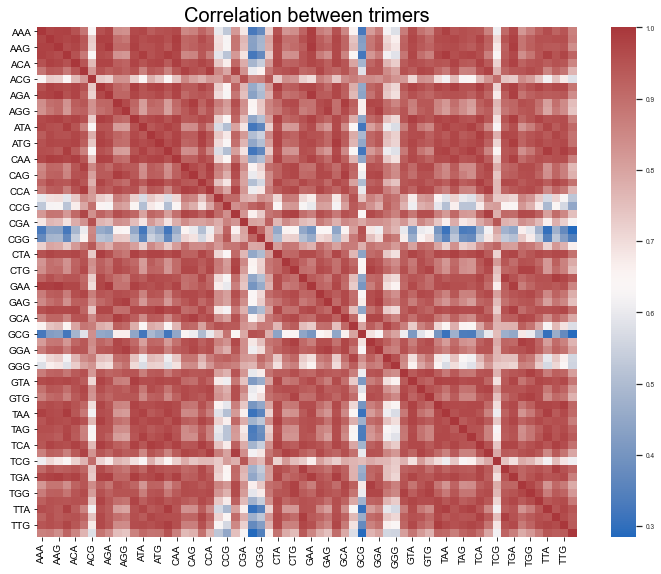

In [14]:
#plot a heatmap of correlation between features
kmer_corr = kmer_matrix.corr()
fig = plt.figure(figsize=(10,8))
plt.title('Correlation between trimers', fontdict={'fontsize': 20})
sns.set(font_scale=.6)
sns.heatmap(kmer_corr, cmap="vlag")
plt.tight_layout()
plt.show()

This heatmap shows that there is high correlation between most of our features. This will affect our model, and I may be able to find a way to extract features that have no correlation in common, or classifiers that can deal with a high levele of colinearity.

### Mean Values for each trimer grouped by species

Now, let's take a look at the mean values for every column group by the 4 species' DNA I added to this dataframe as an example.

In [15]:
mean_agg_df = kmer_matrix.groupby('target', sort=False).agg(['mean'])
mean_agg_df

,AAA,AAC,AAG,AAT,ACA,ACC,ACG,ACT,AGA,AGC,...,TCG,TCT,TGA,TGC,TGG,TGT,TTA,TTC,TTG,TTT
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,...,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
target,,,,,,,,,,,,,,,,,,,,,
human,60.229400,33.362550,58.012250,34.190950,42.902200,35.12250,12.653950,31.898350,61.794450,46.252500,...,11.310700,35.77230,47.596600,40.074900,51.249600,33.977450,21.301150,35.017850,33.329400,33.42700
chimp,67.194300,37.500850,65.028200,37.705900,48.163300,40.80795,14.604500,35.642400,69.796600,52.699600,...,12.945650,39.50585,53.729300,45.264000,58.448150,38.660100,23.541550,38.992100,37.130300,36.00340
dolphin,47.661000,29.020600,49.433050,26.596250,36.743850,33.69755,15.967300,27.132200,53.910250,44.904550,...,13.051750,31.85410,40.071600,37.548450,47.272250,29.036600,17.242750,31.348700,27.255200,28.29850
oak,46.520700,23.288300,41.873250,35.526600,26.295850,16.25395,7.664500,22.174450,39.199150,21.407250,...,9.253550,28.96365,37.352750,24.595600,35.381750,26.230500,22.769400,30.478900,40.989250,37.80160
mushroom,31.000975,24.464066,29.259715,23.088972,25.872618,23.17802,21.090998,19.591673,27.279295,22.428207,...,24.247187,26.01928,22.885971,24.272693,28.102626,19.113878,13.412528,28.245236,26.103601,23.72078


In [16]:

#set up the dimension of each subplot and the final graph
rows = 16
cols = 4
fig_cols = 5
fig_rows = 1

#get the total max and min for scaling later
mean_agg = mean_agg_df
mean_max = mean_agg.max().max()
mean_min = mean_agg.min().min()

#Extract the title for each subplot, and the trimers in each matrix
mean_agg_index = [f'{x.title()} Genome' for x in mean_agg.index]
kmer_index = np.array([x[0] for x in mean_agg.columns]).reshape(rows, cols)
#scale the data with MinMax
mean_agg = (np.array(mean_agg) - mean_min) / (mean_max - mean_min)

#plot the graph
fig = make_subplots(rows=fig_rows, cols=fig_cols, subplot_titles=mean_agg_index)
layout = {'title':'Scaled Mean Values of Each Trimer Grouped by Genome', 'width':1200, 'height':600}
for row_index in range(fig_rows):
    for col_index in range(fig_cols):
        index = col_index + fig_rows*row_index
        array = np.array(mean_agg[index]).astype(float).reshape(rows, cols)
        #draw a heatmap for genome
        fig.add_trace(go.Heatmap(z=array, coloraxis='coloraxis'), row=row_index+1, col=col_index+1)
        #draw each trimer over each square in each subplot
        for k in range(rows):
            for j in range(cols):
                fig.add_annotation(text=np.array(kmer_index).reshape(rows, cols)[k][j], 
                                   x=j, y=k, showarrow=False, row=row_index+1, col=col_index+1, font=dict(size=9, color="#222299"))
        layout[f'xaxis{index+1 if index > 0 else ""}'] = dict(visible=False)
        layout[f'yaxis{index+1 if index > 0 else ""}'] = dict(autorange='reversed',visible=False)

fig.update_layout(layout)
fig.update_coloraxes(colorscale = 'bupu')
plt.show()

In this graph, we are visualizing those mean values for every columns arranged as a 2-dimensional grid. Each subplot is one of the four species, and now we can visually compare the means of their values together. It looks like there are some patterns emerging already. For the mammalian genomes (human, chimp, and dolphin) there are a lot of areas that are visually similiar. Even some parts of the Oak genome are related to the three others, but for the most part it is easy to distinguish already that it is different.

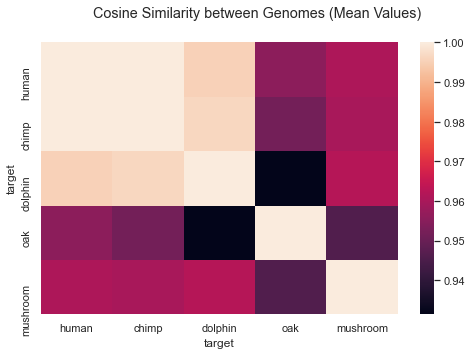

In [17]:
from sklearn.metrics.pairwise import cosine_similarity

cosine_similiarity_map = pd.DataFrame(cosine_similarity(np.array(mean_agg_df),np.array(mean_agg_df)), index=mean_agg_df.index, columns=mean_agg_df.index)
fig = plt.figure(figsize=(8,5))
sns.set(font_scale=1)
sns.set_style("whitegrid")
sns.heatmap(cosine_similiarity_map)
plt.suptitle('Cosine Similarity between Genomes (Mean Values)')
plt.show()

We have visually seen the similiarity between our features in different classes, but I also compute the cosine similiarity between each class. Note that the bottom of this scale is still a value of high similiarity. It seems that all of our classes have a high value of cosine similiarity.

Now let's take a look at a visualization of the variance in each genome's features.

In [18]:
var_agg_df = kmer_matrix.groupby('target', sort=False).agg(['std'])
var_agg_df

,AAA,AAC,AAG,AAT,ACA,ACC,ACG,ACT,AGA,AGC,...,TCG,TCT,TGA,TGC,TGG,TGT,TTA,TTC,TTG,TTT
,std,std,std,std,std,std,std,std,std,std,...,std,std,std,std,std,std,std,std,std,std
target,,,,,,,,,,,,,,,,,,,,,
human,152.290764,67.642467,125.621148,79.096607,82.123832,65.184829,18.903554,62.487751,122.173205,68.280781,...,15.059505,55.404058,100.345189,61.190007,84.801428,67.115566,48.823667,54.837686,68.444691,53.748604
chimp,234.256728,100.790536,194.826161,113.137705,115.188170,100.610751,27.481160,91.197753,186.499926,100.648139,...,21.016296,77.806438,150.166717,89.787638,125.387824,102.385897,69.439293,80.573712,100.987289,68.932645
dolphin,64.107743,29.643241,51.848806,33.370277,35.684144,30.359520,16.704505,26.367703,57.280346,43.470443,...,12.231314,30.718642,40.474772,34.388602,41.216353,27.953127,22.330187,29.380003,29.172702,32.614920
oak,67.254613,29.056121,55.483528,36.632032,35.589864,13.775788,7.173159,20.372660,62.033049,21.573970,...,7.586042,25.275893,44.364118,19.880798,27.105133,21.680115,20.768748,25.435811,35.695604,32.168291
mushroom,27.519239,19.969099,25.391396,19.881351,20.695307,18.666483,17.513898,15.329258,23.976195,19.428896,...,20.425386,21.431633,19.790858,19.798527,22.784046,15.766749,11.787164,22.950091,22.093303,20.889599


In [19]:
#set up the dimension of each subplot and the final graph
rows = 16
cols = 4
fig_cols = 5
fig_rows = 1

#Extract the title for each subplot, and the trimers in each matrix
var_agg = var_agg_df
var_agg_index = [f'{x.title()} Genome' for x in var_agg.index]
kmer_index = np.array([x[0] for x in var_agg.columns]).reshape(rows, cols)
var_agg = np.array(var_agg)
           
#plot the graph
fig = make_subplots(rows=fig_rows, cols=fig_cols, subplot_titles=var_agg_index)
layout = {'title':'Scaled Variance of Each Trimer Column Grouped by Genome', 'width':1200, 'height':600}
for row_index in range(fig_rows):
    for col_index in range(fig_cols):
        index = col_index + fig_rows*row_index
        array = np.array(var_agg[index]).astype(float).reshape(rows, cols)
        #draw a heatmap for genome
        fig.add_trace(go.Heatmap(z=array, coloraxis='coloraxis'), row=row_index+1, col=col_index+1)
        #draw each trimer over each square in each subplot
        for k in range(rows):
            for j in range(cols):
                fig.add_annotation(text=np.array(kmer_index).reshape(rows, cols)[k][j], 
                                   x=j, y=k, showarrow=False, row=row_index+1, col=col_index+1, font=dict(size=9, color="#222299"))
        layout[f'xaxis{index+1 if index > 0 else ""}'] = dict(visible=False)
        layout[f'yaxis{index+1 if index > 0 else ""}'] = dict(autorange='reversed',visible=False)

fig.update_layout(layout)
fig.update_coloraxes(colorscale = 'tempo')
plt.show()

Based on this visualization, we can see that some genomes have higher variance than others. It will be interesting to see if this has an impact on multiclass models, or could be explained during binary classification of two classes that have different levels of variance.

# Train Test Split

I will want to do a multi-class model later on, but I will start with a 2 class dataframe to create a baseline model.

In [20]:
baseline_df = pd.concat([human_df, oak_df], axis=0).reset_index(drop=True)

In [21]:

labeler = LabelEncoder()

X = baseline_df.drop(columns='target')
y = labeler.fit_transform(baseline_df['target'])

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

Now that I have split the data into training and testing sets, I can transform the X's into the dataframe's we will use in the model using the custom KMerTransformer that was imported. I will start the baseline model with k=3.

In [22]:
kmer_transformer = KMerTransformer(k=3, verbose=False)
X_train_trans = kmer_transformer.fit_transform(X_train)
X_test_trans = kmer_transformer.transform(X_test)

# Baseline Model for Binary Classification

In [23]:

baseline_model = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression(random_state=42))
], verbose=True)
baseline_model

Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier', LogisticRegression(random_state=42))],
         verbose=True)

In [24]:
baseline_model.fit(X_train_trans, y_train)
y_preds = baseline_model.predict(X_test_trans)

[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.0s
[Pipeline] ........ (step 2 of 2) Processing classifier, total=   0.4s


              precision    recall  f1-score   support

       human       0.97      0.96      0.96      5021
         oak       0.96      0.97      0.96      4979

    accuracy                           0.96     10000
   macro avg       0.96      0.96      0.96     10000
weighted avg       0.96      0.96      0.96     10000



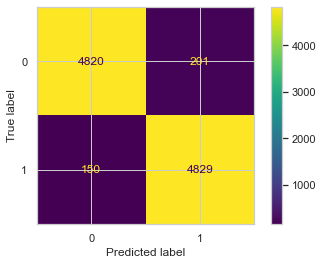

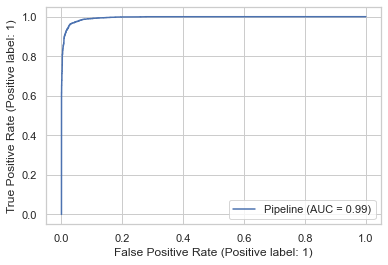

In [25]:

print(classification_report(labeler.inverse_transform(y_test), labeler.inverse_transform(y_preds)))

plot_confusion_matrix(baseline_model, X_test_trans, y_test)
plt.show()

plot_roc_curve(baseline_model, X_test_trans, y_test)
plt.show()

This baseline model is working

# Human vs Chimpanzee DNA Binary Classifier

We can assume that Human and Chimpanzee DNA is much more similar than Human and Oak DNA from our intial EDA and cosine similiarity tests. I will try to run the same LogisiticRegression classifier on just Human and Chimapanzee DNA

In [26]:
human_chimp_df = pd.concat([human_df, chimp_df], axis=0).reset_index(drop=True)

labeler = LabelEncoder()

X = human_chimp_df.drop(columns='target')
y = labeler.fit_transform(human_chimp_df['target'])

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

kmer_transformer = KMerTransformer(k=3, verbose=False)
X_train_trans = kmer_transformer.fit_transform(X_train)
X_test_trans = kmer_transformer.transform(X_test)

human_chimp_model = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression(random_state=42))
], verbose=True)

human_chimp_model.fit(X_train_trans, y_train)
y_preds = human_chimp_model.predict(X_test_trans)

print(classification_report(labeler.inverse_transform(y_test), labeler.inverse_transform(y_preds)))

Finding all kmer permutations for k=3


  0%|          | 0/30000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.0s
[Pipeline] ........ (step 2 of 2) Processing classifier, total=   0.4s
              precision    recall  f1-score   support

       chimp       0.53      0.49      0.51      4979
       human       0.53      0.57      0.55      5021

    accuracy                           0.53     10000
   macro avg       0.53      0.53      0.53     10000
weighted avg       0.53      0.53      0.53     10000



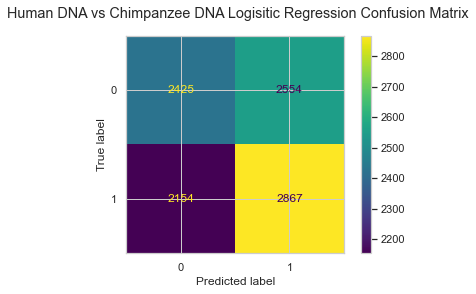

In [27]:
plot_confusion_matrix(human_chimp_model, X_test_trans, y_test)
plt.suptitle('Human DNA vs Chimpanzee DNA Logisitic Regression Confusion Matrix')

plt.show()

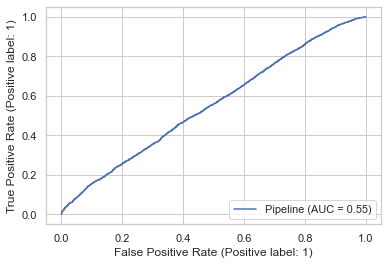

In [28]:
plot_roc_curve(human_chimp_model, X_test_trans, y_test)
plt.show()

The untuned Logisitic Regression is not accurate at all. A 53% accuracy score is barely more than just random chance because the two classes in the test set are balanced. This may be due to the high colinearity of our features. Since I am sticking with this feature set for now, I will try out different classifiers that may work better with high colinearity.

# Grid Search for Best Binary Classifier, k=3

Since Logisitic Regression does not seem to be a good classifier for our data, I will implement a grid search on different parameters for many different classifiers to see if we can find one that will fit the data better. The model is still using the same training and testing data trimers (k=3) from the KMerTransformer. I will assume that with a higher k, we will see a better accuracy score, but it will also take longer to fit each model. If this grid search finds good classifiers, I could increase the k in another grid search, but on a smaller set of parameters. First let's just try the untuned classifiers.

In [29]:

num_features = len(X_train_trans.columns)

human_chimp_model = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression(random_state=42))
])

RANDOM_STATE = 42

params = [
    {'classifier':[LogisticRegression(random_state=RANDOM_STATE)]},
    {'classifier':[GaussianNB()]},
    {'classifier':[KNeighborsClassifier()]},
    {'classifier':[RandomForestClassifier(random_state=RANDOM_STATE)]},
    {'classifier':[ExtraTreesClassifier(random_state=RANDOM_STATE)]},
    {'classifier':[XGBClassifier(random_state=RANDOM_STATE)]},
    {'classifier':[GradientBoostingClassifier(random_state=RANDOM_STATE)]},
    {'classifier':[SVC(random_state=RANDOM_STATE)]}
]

grid_searcher_clf = GridSearchCV(human_chimp_model, params, cv=3, scoring='accuracy', verbose=1)

with parallel_backend('threading', n_jobs=-1):
    grid_searcher_clf.fit(X_train_trans, y_train)
    best_est = grid_searcher_clf.best_estimator_
    y_preds = best_est.predict(X_test_trans)
    
print('Best Estimator:')
print(best_est)

print(classification_report(labeler.inverse_transform(y_test), labeler.inverse_transform(y_preds)))

Fitting 3 folds for each of 8 candidates, totalling 24 fits
Best Estimator:
Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier', ExtraTreesClassifier(random_state=42))])
              precision    recall  f1-score   support

       chimp       0.78      0.80      0.79      4979
       human       0.80      0.78      0.79      5021

    accuracy                           0.79     10000
   macro avg       0.79      0.79      0.79     10000
weighted avg       0.79      0.79      0.79     10000



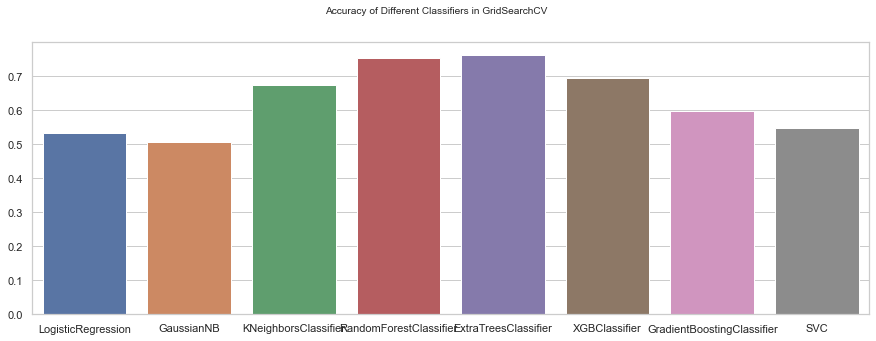

In [30]:
fig, ax = plt.subplots(figsize=(15,5))
sns.set(font_scale = .6)
cv_results = list(grid_searcher_clf.cv_results_['mean_test_score'])
cv_params = [re.sub(r'\(.*?\)', "", str(x['classifier']).replace("\n", "")) for x in grid_searcher_clf.cv_results_['params']]
sns.barplot(cv_params, cv_results)
fig.suptitle('Accuracy of Different Classifiers in GridSearchCV ')
plt.show()

With the baseline scores for each untuned classifier, ExtraTreesClassifier had the highest accuracy so we will continue to tune with that model. First, let's look at the accuracy and metrics for an untuned ExtraTreesClassifier when k=6.

In [31]:
human_chimp_model = Pipeline(steps=[
    ('kmer_transformer', KMerTransformer(k=6, verbose=False)),
    ('scaler', StandardScaler()),
    ('classifier', ExtraTreesClassifier())
])

human_chimp_model.fit(X_train, y_train)
y_preds = human_chimp_model.predict(X_test)

print(classification_report(labeler.inverse_transform(y_test), labeler.inverse_transform(y_preds)))

              precision    recall  f1-score   support

       chimp       0.87      0.88      0.87      4979
       human       0.88      0.86      0.87      5021

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



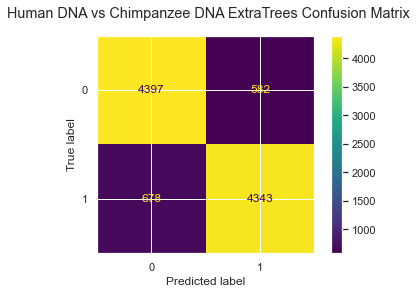

In [32]:
sns.set(font_scale = 1)
plot_confusion_matrix(human_chimp_model, X_test, y_test)
plt.suptitle('Human DNA vs Chimpanzee DNA ExtraTrees Confusion Matrix')
plt.savefig('img/graphs/untuned_extratrees_confusion.png', dpi=300)
plt.show()

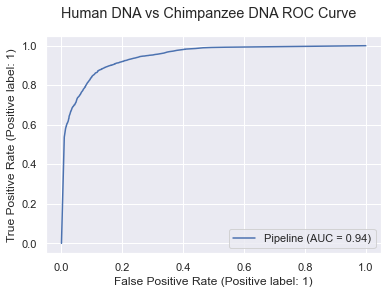

In [33]:
plot_roc_curve(human_chimp_model, X_test, y_test)
plt.suptitle('Human DNA vs Chimpanzee DNA ROC Curve')
plt.savefig('img/graphs/untuned_extratrees_roc.png', dpi=300)
plt.show()

That's not a bad score compared to our baseline model of 53%. The accuracy in this model is 87% for classifying between Human and Chimpanzee DNA. The AUC score is 94%, and hugging the top left corner of the graph. Can we improve on this score with hyperparameter tuning? Sure. But let's try introducing a new preprocessing algorithm in the next section to see if we can optimize our feature transformation algorithm first.

# K-Group K-mer Transformer

Here I will create another custom transformer for preprocessing the data. Similar to the KMerTransformer, this transformer will create frequency dictionaries for each row of data. Unlike the KMerTransformer, it will pool all the A's, C's, G's, and T's counts' instead of their unique sequences.

In other words, if we have a sequence like 'AAGTCGAGT' we will have 3 A's, 1 C, 3 G's, and 2 T's. So the sequence will populate a column named: 'A2C1G3T2'. Similiarly, a sequence like 'GTGAAACTG' would also populate the same column. This means that we will create many times less columns for the same k. Thus, we will increase k significantly when we call the transformer.

![](img/kgroup_animation.gif)

With the imported KGroupKMerTransformer class, let's try it out on the data with a k=12

In [34]:
human_chimp_df = pd.concat([human_df, chimp_df], axis=0).reset_index(drop=True)

labeler = LabelEncoder()

X = human_chimp_df.drop(columns='target')
y = labeler.fit_transform(human_chimp_df['target'])

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

human_chimp_model_k12group = Pipeline(steps=[
    ('kgroup_transformer', KGroupKMerTransformer(k=12, verbose=False)),
    ('kgroup_column_pruner', KGroupColumnPruner()),
    ('scaler', StandardScaler()),
    ('classifier', ExtraTreesClassifier(random_state=42))
], verbose=True)

human_chimp_model_k12group.fit(X_train, y_train)
y_preds = human_chimp_model_k12group.predict(X_test)

print(classification_report(labeler.inverse_transform(y_test), labeler.inverse_transform(y_preds)))

Finding all k-grouped k-mer permutations for k=12
Total columns: 455


  0%|          | 0/30000 [00:00<?, ?it/s]

[Pipeline]  (step 1 of 4) Processing kgroup_transformer, total= 1.1min

            Original Column Length: 455
            Pruned Column Length: 454
            
[Pipeline]  (step 2 of 4) Processing kgroup_column_pruner, total=   0.1s
[Pipeline] ............ (step 3 of 4) Processing scaler, total=   0.1s
[Pipeline] ........ (step 4 of 4) Processing classifier, total=  10.7s


  0%|          | 0/10000 [00:00<?, ?it/s]

              precision    recall  f1-score   support

       chimp       0.85      0.87      0.86      4979
       human       0.87      0.85      0.86      5021

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



As you can see, we get 86% accuracy for a fraction of the columns we used in the KMerTransformer when k=6. Let's continue this experiment and increase k to 36. 

In [35]:
human_chimp_model_k36group = Pipeline(steps=[
    ('kgroup_transformer', KGroupKMerTransformer(k=36, verbose=False)),
    ('kgroup_column_pruner', KGroupColumnPruner()),
    ('scaler', StandardScaler()),
    ('classifier', ExtraTreesClassifier(random_state=42))
], verbose=True)

human_chimp_model_k36group.fit(X_train, y_train)
y_preds = human_chimp_model_k36group.predict(X_test)

print(classification_report(labeler.inverse_transform(y_test), labeler.inverse_transform(y_preds)))

Finding all k-grouped k-mer permutations for k=36
Total columns: 9139


  0%|          | 0/30000 [00:00<?, ?it/s]

[Pipeline]  (step 1 of 4) Processing kgroup_transformer, total= 4.4min

            Original Column Length: 9139
            Pruned Column Length: 7386
            
[Pipeline]  (step 2 of 4) Processing kgroup_column_pruner, total=   2.2s
[Pipeline] ............ (step 3 of 4) Processing scaler, total=   6.2s
[Pipeline] ........ (step 4 of 4) Processing classifier, total= 1.1min


  0%|          | 0/10000 [00:00<?, ?it/s]

              precision    recall  f1-score   support

       chimp       0.90      0.91      0.90      4979
       human       0.91      0.90      0.90      5021

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

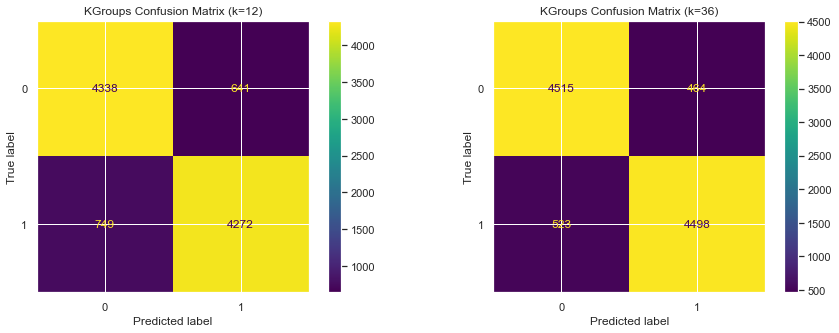

In [36]:
fig, ax = plt.subplots(figsize=(15,5), ncols=2)
sns.set(font_scale = 1)
plot_confusion_matrix(human_chimp_model_k12group, X_test, y_test, ax=ax[0])
plot_confusion_matrix(human_chimp_model_k36group, X_test, y_test, ax=ax[1])
ax[0].set_title('KGroups Confusion Matrix (k=12)')
ax[1].set_title('KGroups Confusion Matrix (k=36)')
plt.show()

  0%|          | 0/10000 [00:00<?, ?it/s]

<Figure size 432x288 with 0 Axes>

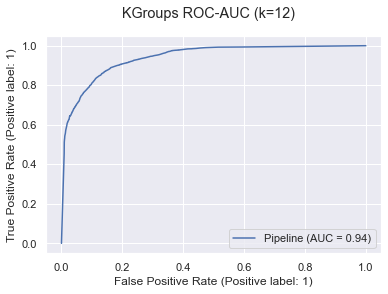

In [37]:
fig = plt.figure()
plot_roc_curve(human_chimp_model_k12group, X_test, y_test)
plt.suptitle('KGroups ROC-AUC (k=12)')
plt.show()

  0%|          | 0/10000 [00:00<?, ?it/s]

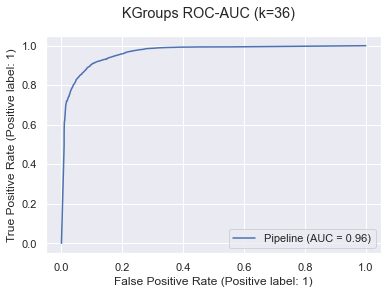

In [38]:
plot_roc_curve(human_chimp_model_k36group, X_test, y_test)
plt.suptitle('KGroups ROC-AUC (k=36)')
plt.show()

Now we get 90% accuracy when comparing Human and Chimpanzee DNA and k=36. After pruning columns that were never populated, we used 7386 total columns. Our AUC score is now 96% and is looking even better than in our previous model.

So far, so good - let's try this model on Multi-Class data.

# Multi-Class Classification

Now we will try the KGroupKMerTransformer on Multiclass data with k=36.

In [39]:
species_compare_df = pd.concat([human_df, chimp_df, dolphin_df, oak_df, mushroom_df], axis=0)

multilabeler = LabelEncoder()

X = species_compare_df.drop(columns='target')
y = multilabeler.fit_transform(species_compare_df['target'])

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

multiclass_kgroup_model = Pipeline(steps=[
    ('kgroup_transformer', KGroupKMerTransformer(k=36, verbose=False)),
    ('kgroup_column_pruner', KGroupColumnPruner()),
    ('scaler', StandardScaler()),
    ('classifier', ExtraTreesClassifier(random_state=42))
], verbose=True)

multiclass_kgroup_model.fit(X_train, y_train)
y_preds = multiclass_kgroup_model.predict(X_test)

print('Multiclass Performance with KGroup Transformer (k=36)')
print(classification_report(multilabeler.inverse_transform(y_test), multilabeler.inverse_transform(y_preds)))

Finding all k-grouped k-mer permutations for k=36
Total columns: 9139


  0%|          | 0/69997 [00:00<?, ?it/s]

[Pipeline]  (step 1 of 4) Processing kgroup_transformer, total=11.7min

            Original Column Length: 9139
            Pruned Column Length: 8346
            
[Pipeline]  (step 2 of 4) Processing kgroup_column_pruner, total=  11.7s
[Pipeline] ............ (step 3 of 4) Processing scaler, total=  32.6s
[Pipeline] ........ (step 4 of 4) Processing classifier, total= 2.5min


  0%|          | 0/23333 [00:00<?, ?it/s]

Multiclass Performance with KGroup Transformer (k=36)
              precision    recall  f1-score   support

       chimp       0.91      0.83      0.87      5050
     dolphin       0.90      0.87      0.89      5034
       human       0.91      0.87      0.89      4964
    mushroom       0.73      0.84      0.79      3225
         oak       0.86      0.91      0.89      5060

    accuracy                           0.87     23333
   macro avg       0.86      0.87      0.86     23333
weighted avg       0.87      0.87      0.87     23333



It seems that the KGroup Multiclass model is a little less accurate than the binary model. Especially in certain classes. For example, the f1-score for Mushroom is particularily low compared to the others. Let's run the original KMerTransformer model on Multiclass data and compare the results.

In [40]:
multiclass_kmer_model = Pipeline(steps=[
    ('kmer_transformer', KMerTransformer(k=6, verbose=False)),
    ('scaler', StandardScaler()),
    ('classifier', ExtraTreesClassifier(random_state=42))
], verbose=True)

multiclass_kmer_model.fit(X_train, y_train)
y_preds = multiclass_kmer_model.predict(X_test)

print('Multiclass Performance with KMer Transformer (k=6)')
print(classification_report(multilabeler.inverse_transform(y_test), multilabeler.inverse_transform(y_preds)))

Finding all kmer permutations for k=6


  0%|          | 0/69997 [00:00<?, ?it/s]

[Pipeline] .. (step 1 of 3) Processing kmer_transformer, total= 2.9min
[Pipeline] ............ (step 2 of 3) Processing scaler, total=   5.2s
[Pipeline] ........ (step 3 of 3) Processing classifier, total= 1.6min


  0%|          | 0/23333 [00:00<?, ?it/s]

Multiclass Performance with KMer Transformer (k=6)
              precision    recall  f1-score   support

       chimp       0.87      0.82      0.84      5050
     dolphin       0.93      0.91      0.92      5034
       human       0.87      0.86      0.86      4964
    mushroom       0.91      0.94      0.93      3225
         oak       0.89      0.95      0.92      5060

    accuracy                           0.89     23333
   macro avg       0.89      0.90      0.90     23333
weighted avg       0.89      0.89      0.89     23333



  0%|          | 0/23333 [00:00<?, ?it/s]

  0%|          | 0/23333 [00:00<?, ?it/s]

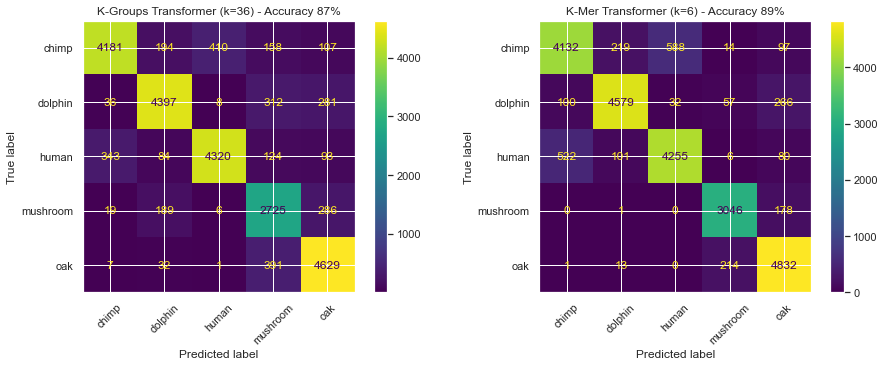

In [41]:
fig, ax = plt.subplots(figsize=(15,5), ncols=2)
plot_confusion_matrix(multiclass_kmer_model, X_test, y_test, ax=ax[1])
plot_confusion_matrix(multiclass_kgroup_model, X_test, y_test, ax=ax[0])
ax[0].set_yticklabels(labels=multilabeler.classes_)
ax[1].set_yticklabels(labels=multilabeler.classes_)
ax[0].set_xticklabels(labels=multilabeler.classes_, rotation=45)
ax[1].set_xticklabels(labels=multilabeler.classes_, rotation=45)
ax[0].set_title('K-Groups Transformer (k=36) - Accuracy 87%')
ax[1].set_title('K-Mer Transformer (k=6) - Accuracy 89%')
plt.show()

We can see in this comparison of confusion matrices that the KMerTransformer preprocessed model is much better at classifying some parts of the data that the KGroup Model has a harder time with. Let's try to combine both models into one, and compare those results.

# KGroup + KMer Model

In this section, we will combine the two previous preprocessing transformers we created into one model. First, we will determine the best k for KGroups if KMer k=6.

After that, we can find the best hyperparameters for the ExtraTreesClassifier using the k we find in the first grid search.

### Finding best K for KGroup

In [42]:

species_compare_df = pd.concat([human_df, chimp_df, dolphin_df, oak_df, mushroom_df], axis=0)

species_compare_df_sample = species_compare_df.sample(n=10000, random_state=42)

multilabeler = LabelEncoder()

X = species_compare_df_sample.drop(columns='target')
y = multilabeler.fit_transform(species_compare_df_sample['target'])

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

multiclass_model = Pipeline(steps=[
    ('trans_union', FeatureUnion([
        ('p1', Pipeline([
            ('kgroup_transformer', KGroupKMerTransformer(k=12, verbose=False)),
            ('kgroup_column_pruner', KGroupColumnPruner(verbose=False)),
        ])),
        ('p2', Pipeline([
            ('kmer_transformer', KMerTransformer(k=6,verbose=False))
        ])),
    ])),    
    ('scaler', StandardScaler()),
    ('classifier', ExtraTreesClassifier(random_state=42))
])


params = {
    'trans_union__p1__kgroup_transformer__k':[6,12,24,36],
}

grid_searcher = GridSearchCV(multiclass_model, param_grid=params, cv=3, scoring='accuracy', verbose=2)

grid_searcher.fit(X_train, y_train)

Fitting 3 folds for each of 4 candidates, totalling 12 fits
[CV] END ...........trans_union__p1__kgroup_transformer__k=6; total time=  36.4s
[CV] END ...........trans_union__p1__kgroup_transformer__k=6; total time=  35.9s
[CV] END ...........trans_union__p1__kgroup_transformer__k=6; total time=  36.0s
[CV] END ..........trans_union__p1__kgroup_transformer__k=12; total time=  37.9s
[CV] END ..........trans_union__p1__kgroup_transformer__k=12; total time=  37.9s
[CV] END ..........trans_union__p1__kgroup_transformer__k=12; total time=  37.7s
[CV] END ..........trans_union__p1__kgroup_transformer__k=24; total time=  46.4s
[CV] END ..........trans_union__p1__kgroup_transformer__k=24; total time=  46.7s
[CV] END ..........trans_union__p1__kgroup_transformer__k=24; total time=  46.4s
[CV] END ..........trans_union__p1__kgroup_transformer__k=36; total time= 1.1min
[CV] END ..........trans_union__p1__kgroup_transformer__k=36; total time= 1.1min
[CV] END ..........trans_union__p1__kgroup_transf

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('trans_union',
                                        FeatureUnion(transformer_list=[('p1',
                                                                        Pipeline(steps=[('kgroup_transformer',
                                                                                         KGroupKMerTransformer(k=12,
                                                                                                               verbose=False)),
                                                                                        ('kgroup_column_pruner',
                                                                                         KGroupColumnPruner(verbose=False))])),
                                                                       ('p2',
                                                                        Pipeline(steps=[('kmer_transformer',
                                                                                         KMerTransformer(k=6,
                                                                                                         verbose=False))]))])),
                                       ('scaler', StandardScaler()),
                                       ('classifier',
                                        ExtraTreesClassifier(random_state=42))]),
             param_grid={'trans_union__p1__kgroup_transformer__k': [6, 12, 24,
                                                                    36]},
             scoring='accuracy', verbose=2)

In [43]:
best_est = grid_searcher.best_estimator_
y_preds = best_est.predict(X_test)
    
print('Best Estimator:')
print(best_est)

Best Estimator:
Pipeline(steps=[('trans_union',
                 FeatureUnion(transformer_list=[('p1',
                                                 Pipeline(steps=[('kgroup_transformer',
                                                                  KGroupKMerTransformer(k=24,
                                                                                        verbose=False)),
                                                                 ('kgroup_column_pruner',
                                                                  KGroupColumnPruner(verbose=False))])),
                                                ('p2',
                                                 Pipeline(steps=[('kmer_transformer',
                                                                  KMerTransformer(k=6,
                                                                                  verbose=False))]))])),
                ('scaler', StandardScaler()),
                ('classifier', Extra

In [44]:
grid_searcher.cv_results_

{'mean_fit_time': array([27.63811906, 28.89821355, 35.07574852, 48.1601433 ]),
 'std_fit_time': array([0.26004769, 0.2901608 , 0.25003181, 0.64514611]),
 'mean_score_time': array([ 8.47269909,  8.95155406, 11.4192698 , 16.69899829]),
 'std_score_time': array([0.09631312, 0.17967769, 0.20425656, 0.15844532]),
 'param_trans_union__p1__kgroup_transformer__k': masked_array(data=[6, 12, 24, 36],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'trans_union__p1__kgroup_transformer__k': 6},
  {'trans_union__p1__kgroup_transformer__k': 12},
  {'trans_union__p1__kgroup_transformer__k': 24},
  {'trans_union__p1__kgroup_transformer__k': 36}],
 'split0_test_score': array([0.63  , 0.6344, 0.6372, 0.6332]),
 'split1_test_score': array([0.6488, 0.6448, 0.6488, 0.6436]),
 'split2_test_score': array([0.6288, 0.6404, 0.6384, 0.6376]),
 'mean_test_score': array([0.63586667, 0.63986667, 0.64146667, 0.63813333]),
 'std_test_score': array([0.0

Based on these results. The best k for KGroup Transformer is k=24, when the KMerTransformer k=6. Let's try that in next section, and fine tune the ExtraTreesClassifier using a grid search.

### Finding best hyperparameters for ExtraTreesClassifier

In [45]:
species_compare_df = pd.concat([human_df, chimp_df, dolphin_df, oak_df, mushroom_df], axis=0)

species_compare_df_sample = species_compare_df.sample(n=10000, random_state=42)

multilabeler = LabelEncoder()

X = species_compare_df_sample.drop(columns='target')
y = multilabeler.fit_transform(species_compare_df_sample['target'])

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

k_trans = Pipeline([
    ('trans_union', FeatureUnion([
            ('p1', Pipeline([
                ('kgroup_transformer', KGroupKMerTransformer(k=24, verbose=False)),
                ('kgroup_column_pruner', KGroupColumnPruner(verbose=False)),
            ])),
            ('p2', Pipeline([
                ('kmer_transformer', KMerTransformer(k=6, verbose=False))
            ]))
        ]))
])

X_train_trans = k_trans.fit_transform(X_train)
X_test_trans = k_trans.transform(X_test)

multiclass_model = Pipeline(steps=[  
    ('scaler', StandardScaler()),
    ('classifier', ExtraTreesClassifier(random_state=42))
])


params = {
    'classifier__n_estimators':range(100,350,50),
    'classifier__criterion':['gini', 'entropy', 'log_loss'],
    'classifier__max_features':['sqrt','log2'],
    'classifier__min_samples_leaf':np.linspace(1,50,8, dtype=int)
}

grid_searcher = GridSearchCV(multiclass_model, param_grid=params, cv=3, scoring='accuracy', verbose=1)

with parallel_backend('threading', n_jobs=-1):
    grid_searcher.fit(X_train_trans, y_train)

Fitting 3 folds for each of 240 candidates, totalling 720 fits


In [46]:
grid_searcher.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier',
                 ExtraTreesClassifier(n_estimators=300, random_state=42))])

# Final Model

For the final model, I will add the hyperparameters I found from the grid searches.
- KGroupTransformer: k=24
- KMerTransformer: k=6
- ExtraTreesClassifier: n_estimators=300

In [54]:
X = species_compare_df.drop(columns='target')
y = multilabeler.fit_transform(species_compare_df['target'])

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

final_model = Pipeline(steps=[
    ('trans_union', FeatureUnion([
        ('p1', Pipeline([
            ('kgroup_transformer', KGroupKMerTransformer(k=24, verbose=False)),
            ('kgroup_column_pruner', KGroupColumnPruner(verbose=False)),
        ])),
        ('p2', Pipeline([
            ('kmer_transformer', KMerTransformer(k=6, verbose=False))
        ])),
    ])),    
    ('scaler', StandardScaler()),
    ('classifier', ExtraTreesClassifier(n_estimators=300, random_state=42))
])

final_model.fit(X_train, y_train)

y_preds = final_model.predict(X_test)

final_model

Pipeline(steps=[('trans_union',
                 FeatureUnion(transformer_list=[('p1',
                                                 Pipeline(steps=[('kgroup_transformer',
                                                                  KGroupKMerTransformer(k=24,
                                                                                        verbose=False)),
                                                                 ('kgroup_column_pruner',
                                                                  KGroupColumnPruner(verbose=False))])),
                                                ('p2',
                                                 Pipeline(steps=[('kmer_transformer',
                                                                  KMerTransformer(k=6,
                                                                                  verbose=False))]))])),
                ('scaler', StandardScaler()),
                ('classifier',
                 ExtraTreesClassifier(n_estimators=300, random_state=42))])

              precision    recall  f1-score   support

       chimp       0.89      0.82      0.86      5050
     dolphin       0.93      0.92      0.93      5034
       human       0.89      0.87      0.88      4964
    mushroom       0.90      0.96      0.92      3225
         oak       0.89      0.95      0.92      5060

    accuracy                           0.90     23333
   macro avg       0.90      0.90      0.90     23333
weighted avg       0.90      0.90      0.90     23333



<AxesSubplot:title={'center':'ExtraTreesClassifier Classification Report'}>

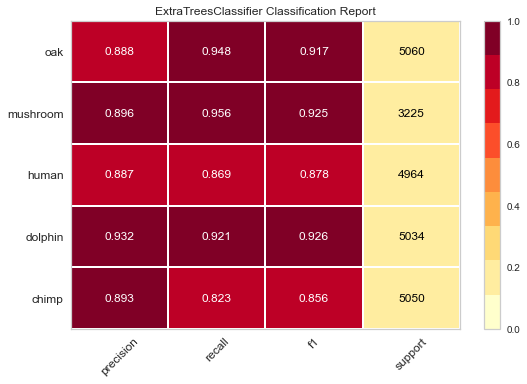

In [61]:
print(classification_report(multilabeler.inverse_transform(y_test), multilabeler.inverse_transform(y_preds)))

from yellowbrick.classifier import ClassificationReport

visualizer = ClassificationReport(final_model, classes=multilabeler.classes_, support=True)

visualizer.fit(X_train, y_train)        # Fit the visualizer and the model
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show(outpath="img/graphs/final_model_classification")

<AxesSubplot:title={'center':'Class Prediction Error for ExtraTreesClassifier'}, xlabel='actual class', ylabel='number of predicted class'>

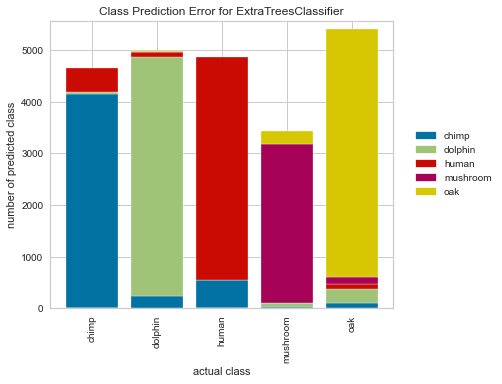

In [60]:
from yellowbrick.classifier import ClassPredictionError

visualizer = ClassPredictionError(final_model, classes=multilabeler.classes_)

visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show(outpath="img/graphs/final_model_clf_error")

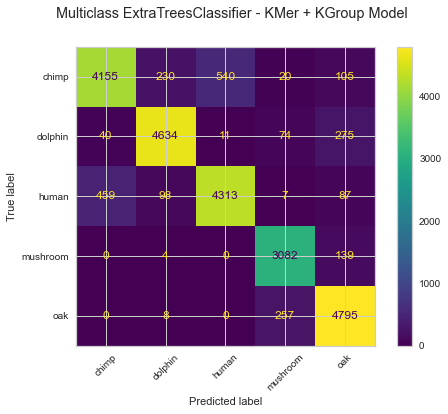

In [62]:
plot_confusion_matrix(final_model, X_test, y_test)
plt.yticks(ticks=range(len(multilabeler.classes_)), labels=multilabeler.classes_)
plt.xticks(ticks=range(len(multilabeler.classes_)), labels=multilabeler.classes_, rotation=45)
plt.suptitle('Multiclass ExtraTreesClassifier - KMer + KGroup Model ')
plt.savefig('img/graphs/final_model_confusion.png', dpi=300)
plt.show()

<AxesSubplot:title={'center':'ROC Curves for ExtraTreesClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

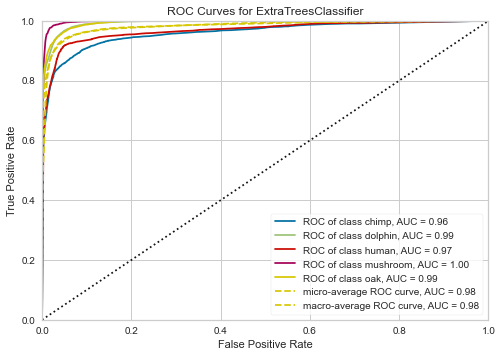

In [59]:
from yellowbrick.classifier import ROCAUC

visualizer = ROCAUC(final_model, classes=multilabeler.classes_)

visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show(outpath="img/graphs/final_model_roc_auc") 

# Results

My final model achieved a 90% acccuracy on test data for classifying sequences between 5 genomes of DNA. Although there is room for improvement in the model, as well as trying out other classification methods (i.e. neural networks), I can reject my null hypothesis, and we can assume there are patterns of similiarity between the classes of the genomic data. Moreover, we are able to distinguish the patterns and variance and classify species from individual DNA sequences with high accuracy.